In [24]:
import numpy as np
#R: np.array (num_states, num_actions)
#rows correspond to states, columns correspond to actions
#R(s1,a1) = 1, R(s1,a2) = 2, R(s2,a1) = 3, R(s2,a2) = 4
R = np.array([[1,2],[3,4]])
for row in R:
    print(" ".join(f"{val:3}" for val in row))


  1   2
  3   4


In [25]:
#T: np.array (num_states, num_actions, num_states)
#T[s,a,s′]=P(s′∣s,a)
T = np.array([
            [[0.5, 0.5], 
             [0.8, 0.2]],
            [[0.2, 0.8], 
             [0.3, 0.7]]
        ])


In [26]:
V = np.array([10,20])
gamma = 0.99

Computing the Bellman backup equation
v(s1) = max(Q(s1,a1), Q(s1,a2))
v(s1) = max(Q(s2,a1), Q(s2,a2))

Q(s1,a1) = R(s1,a1) + gamma * p(s1,a1,s1) * v(s1)  + gamma * p(s1,a1,s2) * V(s2) 

![alt text](<bellman equation 1.JPG>)

Reward <bold>function is usually r(s) or r(s,a) or even r(s,a,s'). In the above example it is r(s,a). The immediate reward R when taken action a from state s. R = 3 is the immediate reward for taking action a1 from state s2.
p = transitional matrix (T (s,a,s'))

![alt text](<Q calculation.JPG>)

In [20]:
Q = np.zeros((2,2))
print(Q)
Q = R + gamma * np.sum(T * V, axis=2)
print(Q)

V = np.max(Q, axis=1)
print(V)

[[0. 0.]
 [0. 0.]]
[[15.85 13.88]
 [20.82 20.83]]
[15.85 20.83]


Rule of matrix multiplication

If you multiply a matrix of shape:
( 𝐴 × 𝐵 )
with a matrix of shape 
( 𝐵 × 𝐶)

you get a new matrix of shape:
( 𝐴 × 𝐶 )

👉 The inner dimensions (B) must match. The result has the outer dimensions.

# POLICY

policy: np.array (num_states)
R: np.array (num_states, num_actions)
T: np.array (num_states, num_actions, num_states)
gamma: float
tol: float

![alt text](<policy reward.JPG>) 

![alt text](<policy transition.JPG>) 

![alt text](<policy evaluation - 1.JPG>) 

![alt text](<policy evaluation - 2.JPG>)


In [102]:
#Base Test - Setup
R = np.array([[1, 2], [3, 4]])
T = np.array([
            [[0.5, 0.5], [0.8, 0.2]],
            [[0.2, 0.8], [0.3, 0.7]]
        ])

In [103]:
#1b-0-basic: Policy evaluation expected type and shape
#Deterministic policy
policy = np.array([0, 1])
gamma = 0
V = np.zeros(2)

In [107]:
#Demo np.sum
a = np.array([[0.3,0.7],[0.4,0.6]])
b = np.array([[10,20],[30,40]])
print(a * b)
c = np.sum(a * b, axis=0)
d = np.sum(a * b, axis=1)
print(c)
print(d)

[[ 3. 14.]
 [12. 24.]]
[15. 38.]
[17. 36.]


![alt text](lecture_policy_evaluation_Bellman.JPG)

In [105]:
print("policy:", policy)
print("T:", T)
print("R:",R)

tol = 1e-3
diff = np.inf
while(diff > tol):
    Q = R + gamma * np.sum(T * V, axis=2)
    print("Q:", Q)
    if policy.ndim == 1:
        policy_one_hot = np.zeros_like(Q)
        policy_one_hot[np.arange(Q.shape[0]), policy] = 1
        policy = policy_one_hot
        print("policy one hot:", policy)
    V_new = np.sum(policy * Q, axis=1)
    diff = np.max(np.abs(V_new - V))
    V = V_new
print("V new:", V)

policy: [0 1]
T: [[[0.5 0.5]
  [0.8 0.2]]

 [[0.2 0.8]
  [0.3 0.7]]]
R: [[1 2]
 [3 4]]
Q: [[1. 2.]
 [3. 4.]]
policy one hot: [[1. 0.]
 [0. 1.]]
Q: [[1. 2.]
 [3. 4.]]
V new: [1. 4.]


#POLICY ITERATION - POLICY IMPROVEMENT
![Policy Improvement - 1.JPG](<attachment:Policy Improvement - 1.JPG>)

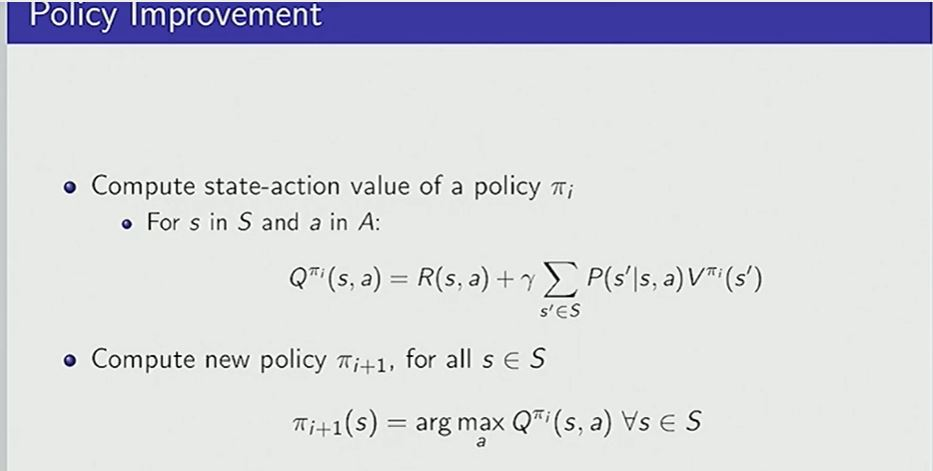

This is quite simple. Find the Q using bellman backup equation. Then choose the policy with argmax of Q (which means whichever policy had a bigger value take it.). Like the Q array of [[19,18] [9,23]]

![policy improvement - argmax.JPG](<attachment:policy improvement - argmax.JPG>)
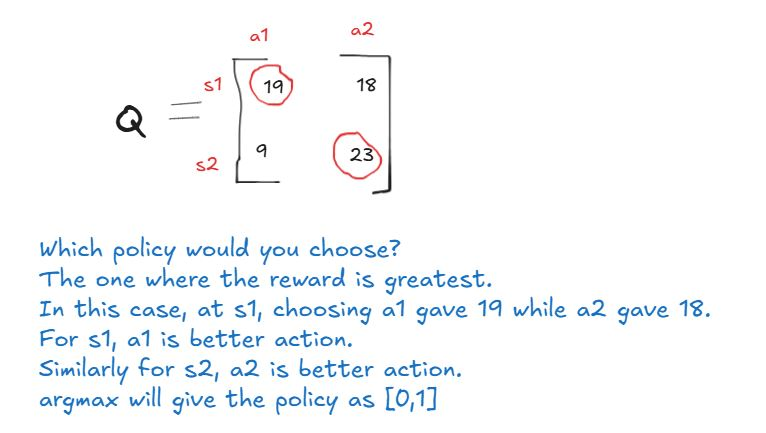

In [3]:
import numpy as np
R = np.array([[10, 0], [0, 5]])
T = np.array([[[1, 0], [0, 1]],
              [[1, 0], [0, 1]]])
V_policy = np.array([10, 20])
gamma = 0.9

Q = R + gamma * np.sum(T * V_policy, axis=2)
print("Q:", Q)

V_policy_new = np.argmax(Q, axis=1)    
print("V policy new:", V_policy_new)

Q: [[19. 18.]
 [ 9. 23.]]
V policy new: [0 1]


![Policy Iteration.JPG](<attachment:Policy Iteration.JPG>)
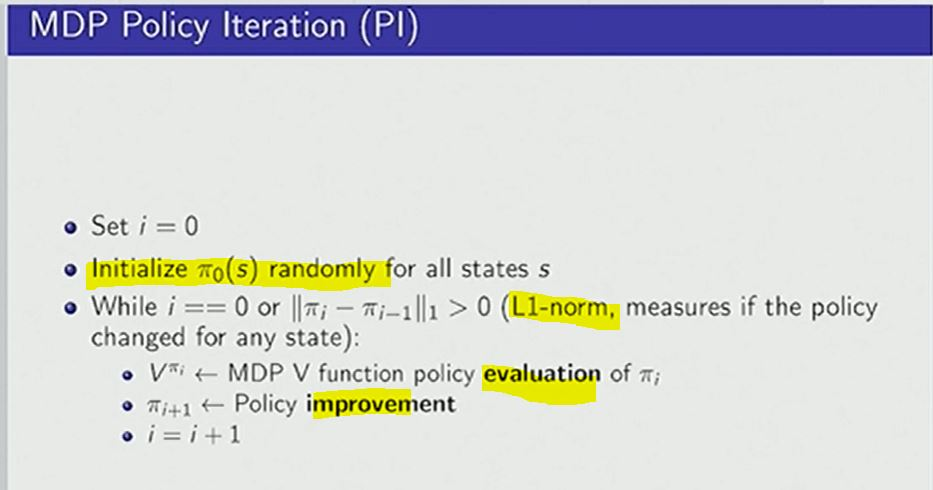

We initialize the policy to random values
> Then we loop until the L1-norm between new policy and old policy is greater than 0
> We keep doing the policy evaluation (i.e. calculate the value of V(s))
> then using the value of V, we calculate the Q and argmax to find the new policy

## VALUE ITERATION

![value iteration - 1.JPG](<attachment:value iteration - 1.JPG>)

![value iteration - 2.JPG](<attachment:value iteration - 2.JPG>)
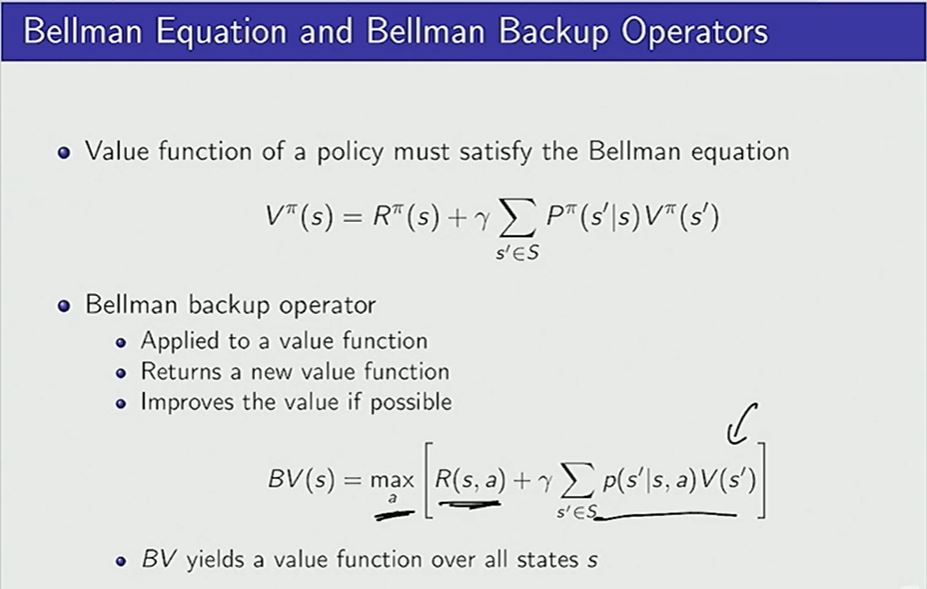
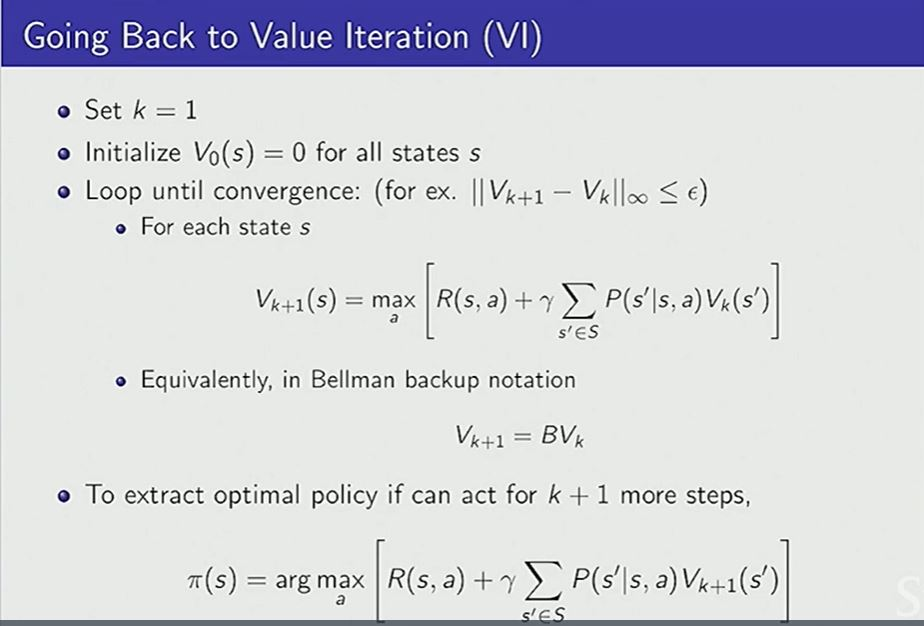

In [29]:
R = np.array([[1, 0], [0, 2]])
T = np.array([[[1, 0], [0, 0]], [[0, 1], [0, 0]]])
gamma = 0.9

tol=1e-3

value_function = None
policy = None
num_states = R.shape

V = np.zeros(num_states)
diff = np.inf
while diff > tol:
        V_new = R + gamma * np.sum(T * V, axis=2)
        policy = np.argmax(V_new, axis=1)
        BV = np.max(V_new, axis=1)
        #print("BV:", BV)
        #diff = np.linalg.norm(BV - V, ord=1)
        #Use Infinity Norm
        diff = np.linalg.norm(BV -V, ord=np.inf)
        print("Diff:", diff)
        V = BV
print("Final V:", V)
print("Policy:", policy)


Diff: 3.0
Diff: 0.8999999999999999
Diff: 0.81
Diff: 0.7290000000000001
Diff: 0.6561000000000003
Diff: 0.59049
Diff: 0.531441
Diff: 0.47829690000000014
Diff: 0.43046720999999977
Diff: 0.38742048900000015
Diff: 0.3486784401000005
Diff: 0.3138105960899997
Diff: 0.28242953648099967
Diff: 0.25418658283289997
Diff: 0.2287679245496097
Diff: 0.20589113209465015
Diff: 0.18530201888518505
Diff: 0.16677181699666477
Diff: 0.1500946352969983
Diff: 0.13508517176729917
Diff: 0.12157665459056943
Diff: 0.10941898913151249
Diff: 0.0984770902183616
Diff: 0.08862938119652597
Diff: 0.0797664430768723
Diff: 0.0717897987691849
Diff: 0.06461081889226605
Diff: 0.05814973700304016
Diff: 0.052334763302736675
Diff: 0.047101286972463186
Diff: 0.042391158275215446
Diff: 0.03815204244769532
Diff: 0.034336838202925435
Diff: 0.030903154382633247
Diff: 0.027812838944369034
Diff: 0.025031555049931598
Diff: 0.022528399544938793
Diff: 0.020275559590444914
Diff: 0.018248003631400778
Diff: 0.016423203268260522
Diff: 0.01478

In [49]:
num_states = 6
num_actions = 2  # O <=> LEFT, 1 <=> RIGHT
current = 'WEAK'
# Larger current makes it harder to swim up the river
currents = ['WEAK', 'MEDIUM', 'STRONG']

current = currents.index(current) + 1

# Configure reward function
R = np.zeros((num_states, num_actions))
R[0, 0] = 0.005
R[5, 1] = 1.

# Configure transition function
T = np.zeros((num_states, num_actions,num_states))

# Encode initial and rewarding state transitions
T[0, 0, 0] = 1.
T[0, 1, 0] = 0.4
T[0, 1, 1] = 0.6

T[5, 1, 5] = 0.6
T[5, 1, 4] = 0.4
T[5, 0, 4] = 1.

# Encode intermediate state transitions
for s in range(1, num_states - 1):
    left, right = 0, 1

    # Going left always succeeds
    T[s, left, s - 1] = 1.

    # Going right sometimes succeeds
    T[s, right, s] = 0.6
    T[s, right, s - 1] = 0.09  * current
    T[s, right, s + 1] = 0.4 - T[s, right, s - 1]
    assert np.isclose(np.sum(T[s, right]), 1.)

R = np.array(R)
T = np.array(T)

#print("R:", R)
#print("T:", T)
np.set_printoptions(precision=3)

gamma = 0.66
tol=1e-3
diff = np.inf
V = np.zeros(num_states)
index = 1
while diff > tol:
    V_new = R + gamma * np.sum(T * V, axis=2)
    print("V_new:", index)
    #print("V_new:", index, V_new)
    policy = np.argmax(V_new, axis=1)
    BV = np.max(V_new, axis=1)
    diff = np.linalg.norm(BV - V, ord=np.inf)
    V = BV
    index += 1
print("Final V:", V)
print("Policy:", policy)



V_new: 1
V_new: 2
V_new: 3
V_new: 4
V_new: 5
V_new: 6
V_new: 7
V_new: 8
V_new: 9
V_new: 10
V_new: 11
V_new: 12
V_new: 13
V_new: 14
V_new: 15
V_new: 16
Final V: [0.015 0.029 0.083 0.239 0.685 1.954]
Policy: [1 1 1 1 1 1]
